# CS375 Assignment 2 Lab Report
#### Group 6 

## Part 1: Task Generalization

In [1]:
%matplotlib inline 
import os
import numpy as np
import tensorflow as tf
import pymongo as pm
import gridfs
import cPickle
import scipy.signal as signal
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook, trange
from assignment_utils import *

### Getting data from the database

In [2]:
from model_switcher import *

In [3]:
my_model_shallow = model_switcher(model_name = 'shallow_bottle',
                          data_name = 'cifar10',
                          loss_name = 'default')

In [4]:
vars(my_model_shallow)

{'collname': 'shallow_bottle_default',
 'data_name': 'cifar10',
 'dbname': 'cifar10',
 'exp_fn': <class experiments.cifar10 at 0x7f72102582c0>,
 'exp_id': 'train_',
 'layers': ['conv1', 'deconv1'],
 'loss_fn': <function losses.autoencoder_loss>,
 'loss_name': 'default',
 'model_fn': <function models.shallow_bottle>,
 'model_name': 'shallow_bottle',
 'test_id': 'test_train_'}

In [5]:
coll = p_get_coll(vars(my_model_shallow)['collname'], vars(my_model_shallow)['dbname'])
print(coll)

coll.distinct('exp_id')

Collection(Database(MongoClient(host=['localhost:24444'], document_class=dict, tz_aware=False, connect=True), u'cifar10'), u'shallow_bottle_default.files')


[u'testrun',
 u'testrun2',
 u'stridefix2',
 u'stridefix3',
 u'stridefix4',
 u'stride2',
 u'stridebig',
 u'stridebig4',
 u'newstride',
 u'newstride2',
 u'newstride3',
 u'omgitworks2',
 u'omgitworks5',
 u'omgitworks9',
 u'ha',
 u'ha2',
 u'ha4',
 u'ha5',
 u'ha6',
 u'ha7',
 u'ha8',
 u'nov1',
 u'nov2',
 u'nov3',
 u'n4',
 u'nov4',
 u'nov5',
 u'test_nov5']

### Plotting the training curve
To see the training curve for the experiment, we pull the training loss and plot it, along with a smoothed version of the training loss obtained by convolving the loss with a boxcar.

nov5


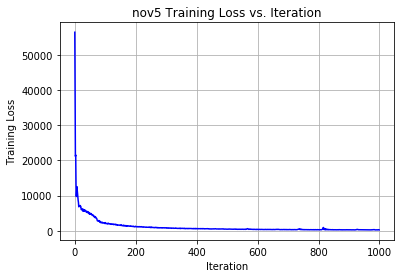

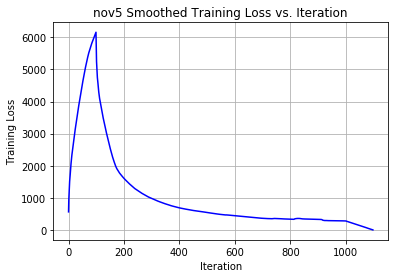

In [6]:
# TODO Double check this. Bit hacky
texp_id = coll.distinct('exp_id')[-1].split('_')[1]
print(texp_id)
p22_training(texp_id,coll)

### Plotting the validation results

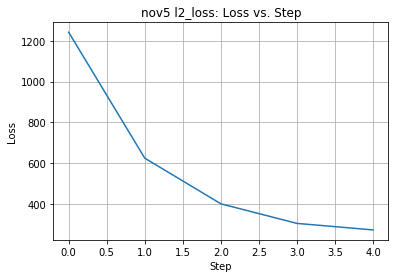

In [7]:
l2_loss, img_inputs, img_prediction = get_validation_data(texp_id, coll, 20)
plot_l2_loss(l2_loss, texp_id)

np_inputs = np.array(img_inputs).transpose([0,2,3,4,1])
np_prediction = np.array(img_prediction).transpose([0,2,3,4,1])
my_shape = np_inputs.shape

In [8]:
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread


In [9]:
def show_row(in_row, num_show = None):
    if num_show is None:
        num_show = len(in_row)
    fig = figure(figsize = [20, 6])
    for i in range(num_show):
        a = fig.add_subplot(1,num_show, i+1)
        a.get_xaxis().set_visible(False)
        a.get_yaxis().set_visible(False)
        imshow(in_row[:,:,:,i])

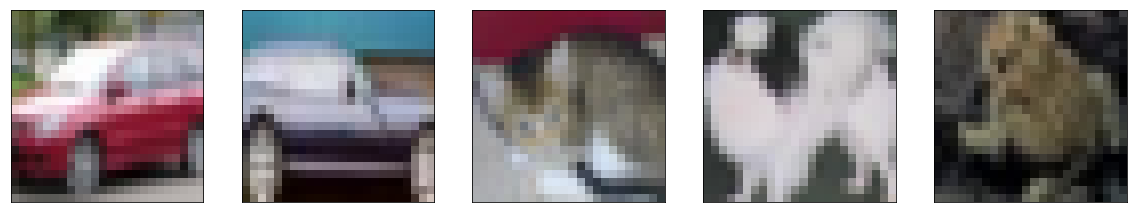

In [10]:
show_row(np_inputs[-1,:].squeeze(), 5)

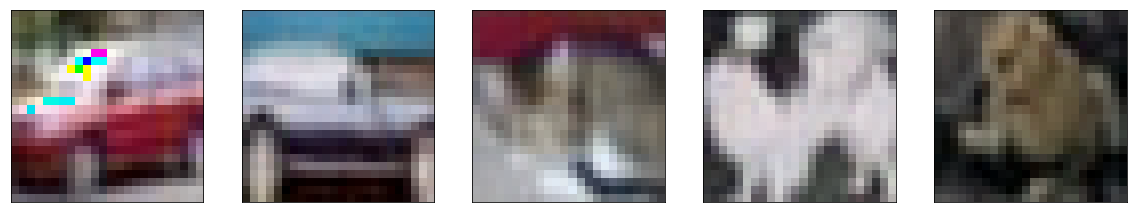

In [11]:
show_row(np_prediction[-1,:].squeeze(), 5)

## Part 2: Representational Similararity Analysis (RSA)


In [12]:
#data = {}
#for iv in v_list:
    #for istep in step_list:
data_exp_id = coll.distinct('exp_id')[-1]
data = p_get_data_list(coll, vars(my_model_shallow)['collname'], 1, 1, data_exp_id)

valid_1000_V6
1000 1


In [ ]:
p_get

## Part 5: Evaluation of the unsupervised models on ImageNet

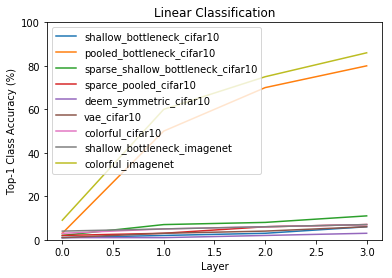

In [45]:
def linear_classification():
    autoencoders = [[1,2,3,6], [3,50,70,80], [2,7,8,11], [2,3,6,7], [1,1,2,3], [1,3,4,6], 
                 [3,5,6,7], [4,5,6,7], [9,60,75,86]]
    autoencoder_legend = ['shallow_bottleneck_cifar10', 'pooled_bottleneck_cifar10', 
                          'sparse_shallow_bottleneck_cifar10', 'sparce_pooled_cifar10',
                        'deem_symmetric_cifar10', 'vae_cifar10', 'colorful_cifar10', 
                          'shallow_bottleneck_imagenet', 'colorful_imagenet']
    x = range(0, len(autoencoders[0]))

    for autoencoder in autoencoders:
        plt.plot(x, autoencoder)
        #plt.plot(len(autoencoder), autoencoder)

    plt.xlabel('Layer')
    plt.ylabel('Top-1 Class Accuracy (%)')
    plt.title("Linear Classification")
    plt.ylim([0,100])
    plt.legend(autoencoder_legend, loc='best')

    plt.show()

linear_classification()